In [46]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

## 1)

In [42]:
#if not already downloaded
#nltk.download('brown')

#word distribution
prova=nltk.FreqDist(nltk.corpus.brown.words(),)
items=list(prova.items())
#filter punctuation 
punctuation=['"','!','.',',',"'",'(',')',';','``',"''",'?','--',':']
items=list(filter(lambda x: x[0] not in punctuation ,items))
#sort
sorted_items = sorted(items, key=lambda x: x[1], reverse=True)
sorted_items[:5]

[('the', 62713), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881)]

In [43]:
output=''
for pair in sorted_items:
    output+=f'{pair[0]}: {pair[1]}\n'
with open('output.txt','w') as f:
    f.write(output)

## 2)

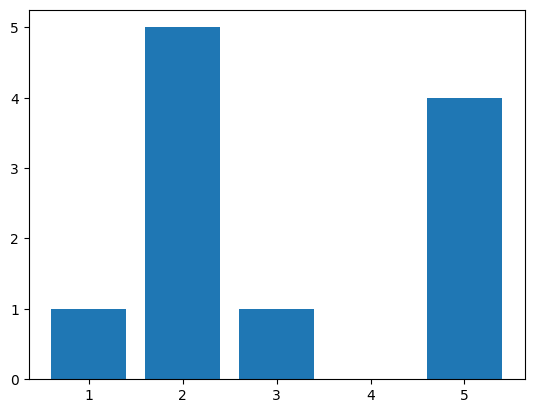

In [59]:
plt.figure()
plt.bar([1,3,5,2],[1,1,4,5])
plt.show()

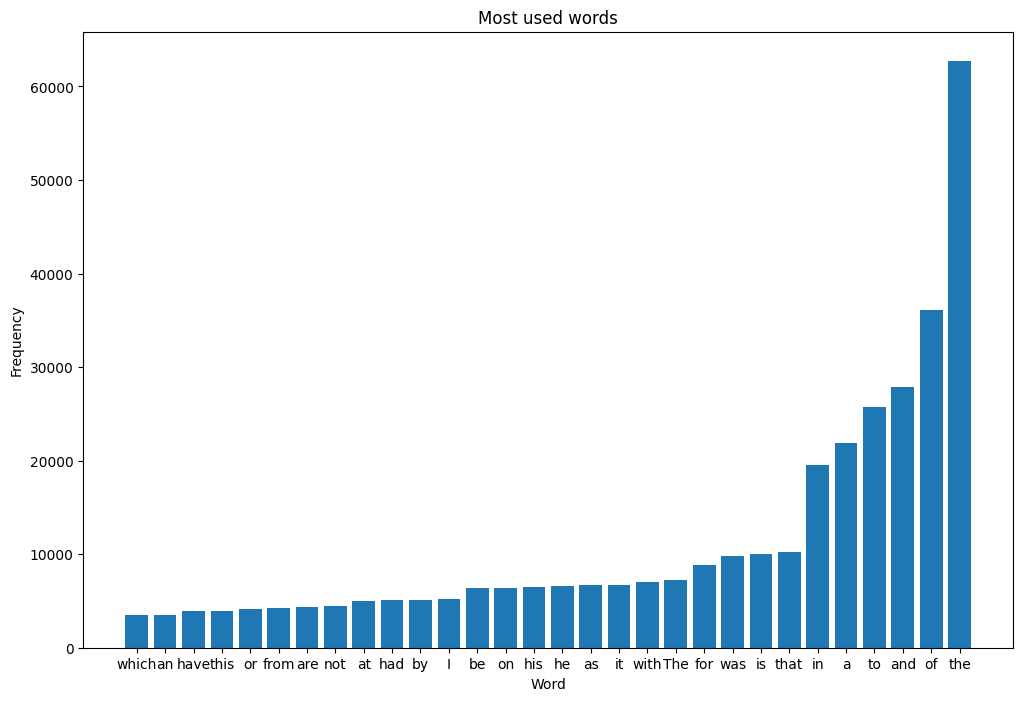

In [82]:
#convert to numpy for convenience
np_sorted_items=np.array(sorted_items)
words=np_sorted_items[:30,0]
values=list(map(lambda x: int(x),np_sorted_items[:30,1]))

plt.figure(figsize=(12,8))
plt.bar(words[::-1],height=values[::-1])
plt.title('Most used words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.ylim(ymin=0)
plt.show()

## 3)

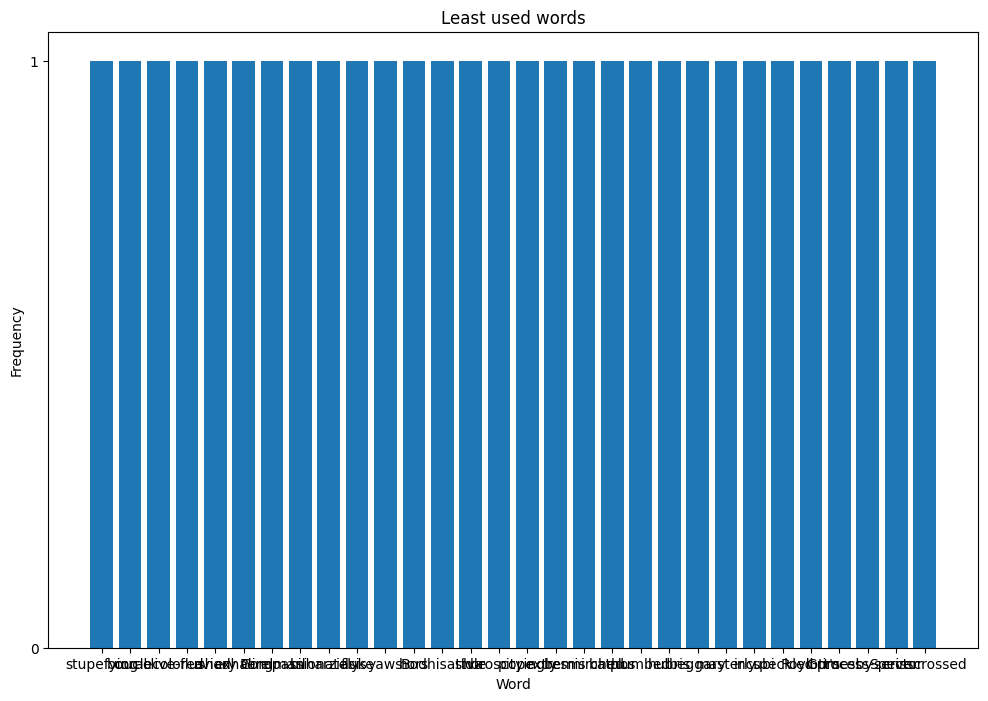

In [228]:
words=np_sorted_items[-30:,0]
values=list(map(lambda x: int(x),np_sorted_items[-30:,1]))

plt.figure(figsize=(12,8))
plt.bar(words[::-1],height=values[::-1])
plt.yticks(range(2))
plt.title('Least used words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.ylim(ymin=0)
plt.show()

It's ugly but all the words are used only once and they are long

## 4)

In [108]:
from collections import defaultdict

In [122]:
#array composed of length of word and its frequency
len_freq=np_sorted_items.copy()
words=list(len_freq[:,0])
words=list(map(lambda x: len(x),words))
len_freq[:,0]=words
len_freq=len_freq.astype(np.int32)
len_freq[:5]

array([[    3, 62713],
       [    2, 36080],
       [    3, 27915],
       [    2, 25732],
       [    1, 21881]])

In [126]:
#use a dictionary where the key is the length and the value is the sum of the frequencies of the words with the same length
dict_word_length_freq = defaultdict(int)
for item in len_freq:
    length=item[0]
    freq=item[1]
    dict_word_length_freq[length]+=freq
word_length_freq=list(dict_word_length_freq.items())
word_length_freq=sorted(word_length_freq, key=lambda x: x[1],reverse=True)
word_length_freq=np.array(word_length_freq)
word_length_freq[:5]

array([[     3, 214199],
       [     2, 173124],
       [     4, 160575],
       [     5, 109803],
       [     6,  85639]])

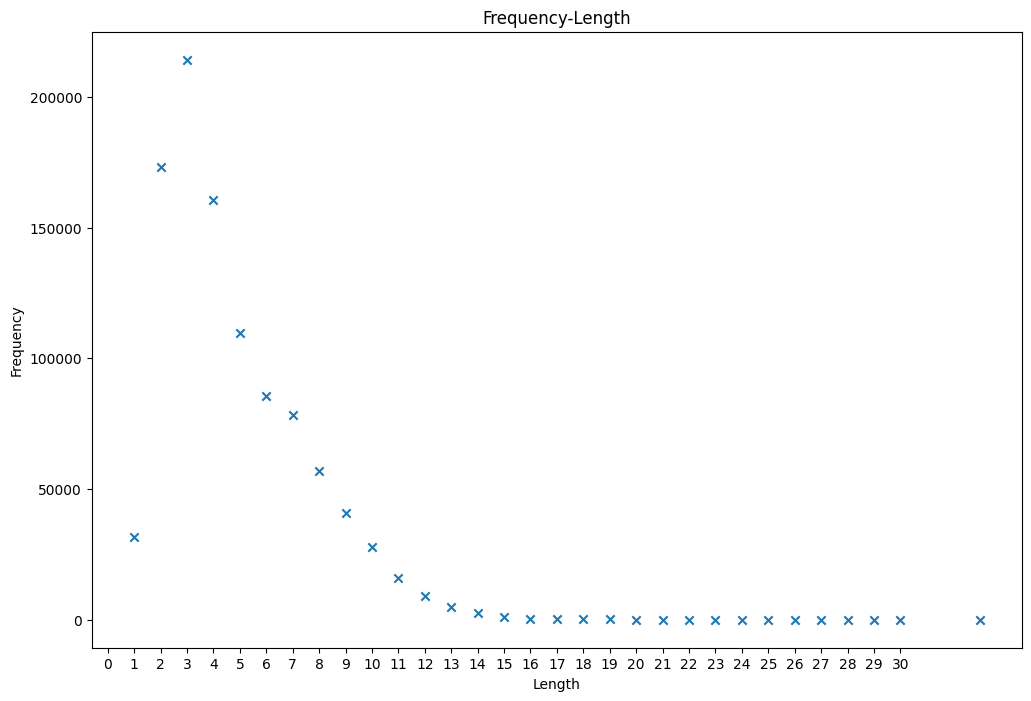

In [135]:
plt.figure(figsize=(12,8))
plt.scatter(word_length_freq[:,0],word_length_freq[:,1],marker='x')
plt.xticks(range(len(word_length_freq[:,0]+1)))
plt.title('Frequency-Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

## 5)

In [141]:
modals=['will', 'must', 'might', 'may', 'could', 'can']
words_dict=dict((x,y) for x,y in sorted_items)
modal_freq=[[modal,words_dict[modal]] for modal in modals]
modal_freq

[['will', 2204],
 ['must', 1003],
 ['might', 670],
 ['may', 1292],
 ['could', 1580],
 ['can', 1738]]

In [156]:
#num of words in corpus
stopper=1161192
words=nltk.corpus.brown.words()
numwords={modal:[] for modal in modals}
numchars={modal:[] for modal in modals}
i=0
checks={modal:False for modal in modals}
#words and chars logging
lsent=0
csent=0
#iterate through all the words
while i<stopper-1:
    word=words[i].lower()
    lsent+=1
    csent+=len(word)
    if word in modals:
        checks[word]=True
    elif word=='.':
        for modal in modals:
            if checks[modal]:
                numwords[modal].append(lsent)
                numchars[modal].append(csent)
        checks={modal:False for modal in modals}
        lsent=0
        csent=0
    i+=1

In [172]:
#calculate averages
avgw={modal:0 for modal in modals}
avgc={modal:0 for modal in modals}
for i in range(len(modals)):
    modal=modals[i]
    w=numwords[modal]
    c=numchars[modal]
    avgw[modal]=sum(w)/len(w)
    avgc[modal]=sum(c)/len(c)
print(f'Average words per sentence: {avgw}\nAverage characters per sentence: {avgc}')

Average words per sentence: {'will': 32.20128585558852, 'must': 31.087591240875913, 'might': 33.273148148148145, 'may': 34.088734567901234, 'could': 32.13947368421053, 'can': 32.357659831121836}
Average characters per sentence: {'will': 140.50049455984174, 'must': 134.29614181438998, 'might': 142.34876543209876, 'may': 148.31172839506172, 'could': 133.57105263157894, 'can': 138.42038600723762}


## 5)

In [180]:
#nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [181]:
#same as before
stopper=1161192
words=nltk.corpus.brown.words()
numwords={stop:[] for stop in stopwords}
numchars={stop:[] for stop in stopwords}
i=0
checks={stop:False for stop in stopwords}
lsent=0
csent=0
while i<stopper-1:
    word=words[i].lower()
    lsent+=1
    csent+=len(word)
    if word in stopwords:
        checks[word]=True
    if word=='.':
        for stop in stopwords:
            if checks[stop]:
                numwords[stop].append(lsent)
                numchars[stop].append(csent)
        checks={stop:False for stop in stopwords}
        lsent=0
        csent=0
    i+=1

Displaying only the first 10

In [188]:
output=''
for i in range(10):
    stop=stopwords[i]
    w=numwords[stop]
    output+=f'{stop}: frequency: {len(w)}, average number of words: {sum(w)/len(w)}\n'
output+='\n\n'
for i in range(10):
    stop=stopwords[i]
    c=numchars[stop]
    output+=f'{stop}: frequency: {len(c)}, average number of chars: {sum(c)/len(c)}\n'
print(output)

i: frequency: 4041, average number of words: 26.12744370205395
me: frequency: 1069, average number of words: 28.029934518241348
my: frequency: 1138, average number of words: 29.351493848857643
myself: frequency: 127, average number of words: 34.74803149606299
we: frequency: 2176, average number of words: 31.036305147058822
our: frequency: 1091, average number of words: 35.30980751604033
ours: frequency: 26, average number of words: 29.5
ourselves: frequency: 64, average number of words: 38.953125
you: frequency: 2513, average number of words: 26.61719060883406
you're: frequency: 146, average number of words: 24.404109589041095


i: frequency: 4041, average number of chars: 98.7268002969562
me: frequency: 1069, average number of chars: 104.37885874649204
my: frequency: 1138, average number of chars: 112.97451669595782
myself: frequency: 127, average number of chars: 135.96850393700788
we: frequency: 2176, average number of chars: 129.5703125
our: frequency: 1091, average number of chars

## 7)

In [215]:
with open('sample.txt') as f:
    txt=f.read().replace('\n','').lower()
#remove punctuation
punctuation=['"','!','.',',',"'",'(',')',';','``',"''",'?','--',':']
for punct in punctuation:
    txt=txt.replace(punct,'')
#tokenize based on whitespaces
words=txt.split(' ')

tok_freq = defaultdict(int)
for word in words:
    tok_freq[word]+=1
tok_freq_list=list(tok_freq.items())
tok_freq_list=sorted(tok_freq_list,key=lambda x: x[1],reverse=True)

print(f'{len(tok_freq_list)} tokens\ntokens and frequency: {tok_freq_list}\n30 most frequent tokens: {[x[0] for x in tok_freq_list[:30]]}')

148 tokens
tokens and frequency: [('of', 13), ('and', 13), ('the', 10), ('a', 9), ('to', 7), ('nlp', 7), ('in', 7), ('will', 6), ('course', 5), ('processing', 5), ('language', 4), ('this', 4), ('for', 4), ('learning', 4), ('natural', 3), ('set', 3), ('various', 3), ('modules', 3), ('data', 3), ('is', 3), ('machine', 3), ('text', 3), ('good', 3), ('field', 2), ('concepts', 2), ('their', 2), ('using', 2), ('other', 2), ('python', 2), ('libraries', 2), ('understanding', 2), ('pipeline', 2), ('as', 2), ('with', 2), ('comprehension', 2), ('we', 2), ('more', 2), ('specific', 2), ('deep', 2), ('methods', 2), ('also', 2), ('involves', 2), ('on', 2), ('gain', 2), ('they', 2), ('practical', 2), ('provides', 1), ('an', 1), ('introduction', 1), ('covering', 1), ('central', 1), ('implementations', 1), ('nltk', 1), ('illustrative', 1), ('example', 1), ('guide', 1), ('students', 1), ('pipelines', 1), ('involved', 1), ('typical', 1), ('broad', 1), ('artificial', 1), ('intelligence', 1), ('that', 1), (

## 8)

In [218]:
import urllib.request
import bs4

In [221]:
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, bs4.element.Comment):
        return False
    return True

def text_from_html(body):
    soup = bs4.BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

In [224]:
url='https://www.oulu.fi/en/courses-and-learning-agreement'
html = urllib.request.urlopen(url).read()
text=text_from_html(html)

C:\Users\emanu\AppData\Local\Temp\ipykernel_8304\525531623.py:10: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  texts = soup.findAll(text=True)


In [227]:
#same as before
text=text.replace('\n','').lower()
punctuation=['"','!','.',',',"'",'(',')',';','``',"''",'?','--',':']
for punct in punctuation:
    txt=txt.replace(punct,'')
words=txt.split(' ')

tok_freq = defaultdict(int)
for word in words:
    tok_freq[word]+=1
tok_freq_list=list(tok_freq.items())
tok_freq_list=sorted(tok_freq_list,key=lambda x: x[1],reverse=True)

print(f'{len(tok_freq_list)} tokens\ntokens and frequency: {tok_freq_list}\n30 most frequent tokens: {[x[0] for x in tok_freq_list[:30]]}')

148 tokens
tokens and frequency: [('of', 13), ('and', 13), ('the', 10), ('a', 9), ('to', 7), ('nlp', 7), ('in', 7), ('will', 6), ('course', 5), ('processing', 5), ('language', 4), ('this', 4), ('for', 4), ('learning', 4), ('natural', 3), ('set', 3), ('various', 3), ('modules', 3), ('data', 3), ('is', 3), ('machine', 3), ('text', 3), ('good', 3), ('field', 2), ('concepts', 2), ('their', 2), ('using', 2), ('other', 2), ('python', 2), ('libraries', 2), ('understanding', 2), ('pipeline', 2), ('as', 2), ('with', 2), ('comprehension', 2), ('we', 2), ('more', 2), ('specific', 2), ('deep', 2), ('methods', 2), ('also', 2), ('involves', 2), ('on', 2), ('gain', 2), ('they', 2), ('practical', 2), ('provides', 1), ('an', 1), ('introduction', 1), ('covering', 1), ('central', 1), ('implementations', 1), ('nltk', 1), ('illustrative', 1), ('example', 1), ('guide', 1), ('students', 1), ('pipelines', 1), ('involved', 1), ('typical', 1), ('broad', 1), ('artificial', 1), ('intelligence', 1), ('that', 1), (